In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import urllib

In [4]:
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:01<00:00, 3.51MB/s]
C:\Users\Prachi\AppData\Local\Temp/ipykernel_11880/2518127973.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [5]:
search_url="https://flight.yatra.com/air-search-ui/seoint/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DXB&destinationCountry=AE&flexi=0&flight_depart_date=27/01/2023&hb=0&noOfSegments=1&origin=AMD&originCountry=IN&type=O&unique=227524472318&version=1.1&viewName=normal"
driver.get(search_url)

In [6]:
print(type(driver))

<class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [7]:
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [8]:
from selenium.webdriver.common.by import By

In [10]:
table = driver.find_elements(By.XPATH,"/html/body/section/section[3]")
airlines= []
products = driver.find_elements(By.CLASS_NAME,'js-flightItem')
for product in products:
    #print(driver.find_elements(By.CLASS_NAME,'js-flightItem'))
    data =  { 
            "Airline":product.find_element(By.CLASS_NAME,"full.mb-8.fs-13.airline-name").text,
            "Source":product.find_element(By.CLASS_NAME,"fs-15.text-uppercase.font-lightestgrey.normal.mr-2.ccode.hide-mobile").text,
            "Destination":product.find_element(By.CLASS_NAME,"ml-5.fs-15.text-uppercase.font-lightestgrey.normal.ccode.hide-mobile").text,
            "Duration":product.find_element(By.CLASS_NAME,"fs-12.bold.du.mb-2").text,
            "Total_Stop":product.find_element(By.CLASS_NAME,"font-lightgrey.fs-11.tipsy.i-b").text,
            "Price":product.find_element(By.CLASS_NAME,"mb-10.fs-20.bold.lh-1.cursor-pointer").text,
            
        }
    airlines.append(data)
for name in airlines:
    print(name['Airline'],name['Source'],name['Destination'],name['Duration'],name['Total_Stop'],name['Price'])
    
df=pd.DataFrame(airlines)    
df

Fly Dubai AMD DXB 3h 25m Non Stop 17,068
Vistara AMD DXB 11h 20m 1 Stop 17,950
IndiGo AMD DXB 3h 15m Non Stop 18,148
IndiGo AMD DXB 7h 00m 1 Stop 19,250
SpiceJet AMD DXB 3h 30m Non Stop 19,303
IndiGo AMD DXB 7h 25m 1 Stop 20,437
SpiceJet AMD DXB 17h 25m 1 Stop 21,494
Air India AMD DXB 12h 35m 1 Stop 21,604
Vistara AMD AUH 16h 05m 1 Stop 21,835
IndiGo AMD DXB 9h 20m 1 Stop 23,051
IndiGo AMD DXB 10h 05m 1 Stop 23,983
SpiceJet AMD DXB 18h 15m 1 Stop 24,205
IndiGo AMD DXB 9h 05m 1 Stop 24,234
IndiGo AMD DXB 11h 00m 1 Stop 24,484
Air Arabia AMD SHJ 3h 00m Non Stop 24,641
SpiceJet AMD DXB 3h 30m Non Stop 24,695
Vistara AMD DXB 14h 40m 2 Stops 24,936
Vistara AMD DXB 13h 00m 2 Stops 25,646
IndiGo AMD DXB 12h 05m 1 Stop 26,321
Vistara AMD DXB 21h 15m 2 Stops 26,870
Vistara AMD DXB 26h 30m 1 Stop 26,885
Vistara AMD AUH 7h 15m 1 Stop 26,948
IndiGo AMD DXB 7h 15m 1 Stop 27,646
Hahn Air AMD DXB 3h 30m Non Stop 28,732
Vistara AMD AUH 17h 45m 2 Stops 31,398
Vistara AMD DXB 31h 45m 2 Stops 32,098
Air 

,Airline,Source,Destination,Duration,Total_Stop,Price
0,Fly Dubai,AMD,DXB,3h 25m,Non Stop,"17,068"
1,Vistara,AMD,DXB,11h 20m,1 Stop,"17,950"
2,IndiGo,AMD,DXB,3h 15m,Non Stop,"18,148"
3,IndiGo,AMD,DXB,7h 00m,1 Stop,"19,250"
4,SpiceJet,AMD,DXB,3h 30m,Non Stop,"19,303"
...,...,...,...,...,...,...
104,Vistara,AMD,DXB,13h 20m,1 Stop,"90,931"
105,Qatar Airways,AMD,DXB,18h 10m,1 Stop,"1,00,453"
106,Vistara,AMD,AUH,23h 55m,1 Stop,"1,13,112"
107,Vistara,AMD,AUH,16h 10m,1 Stop,"1,15,265"


In [11]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stop     0
Price          0
dtype: int64

# EDA

In [12]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins 

df.drop(["Duration"], axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Total_Stop,Price,Duration_hours,Duration_mins
0,Fly Dubai,AMD,DXB,Non Stop,"17,068",3,25
1,Vistara,AMD,DXB,1 Stop,"17,950",11,20
2,IndiGo,AMD,DXB,Non Stop,"18,148",3,15
3,IndiGo,AMD,DXB,1 Stop,"19,250",7,0
4,SpiceJet,AMD,DXB,Non Stop,"19,303",3,30


In [13]:
df["Airline"].value_counts()

Vistara             47
SpiceJet            26
Hahn Air            12
IndiGo               9
Air India            4
Qatar Airways        4
Kuwait Airways       2
Fly Dubai            1
Air Arabia           1
Etihad Airways       1
Emirates             1
Turkish Airlines     1
Name: Airline, dtype: int64

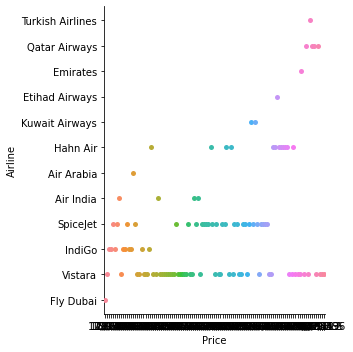

In [20]:
sns.catplot(data=df, x="Price", y="Airline")
plt.show()

In [25]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= False)

Source.head()

,Source_AMD
0,1
1,1
2,1
3,1
4,1


In [22]:
df["Destination"].value_counts()

DXB    93
AUH    15
SHJ     1
Name: Destination, dtype: int64

In [23]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_DXB,Destination_SHJ
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [27]:
df["Total_Stop"].value_counts()

2 Stops     64
1 Stop      37
Non Stop     8
Name: Total_Stop, dtype: int64

In [28]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [29]:
df.head()

,Airline,Source,Destination,Total_Stop,Price,Duration_hours,Duration_mins
0,Fly Dubai,AMD,DXB,Non Stop,"17,068",3,25
1,Vistara,AMD,DXB,1 Stop,"17,950",11,20
2,IndiGo,AMD,DXB,Non Stop,"18,148",3,15
3,IndiGo,AMD,DXB,1 Stop,"19,250",7,0
4,SpiceJet,AMD,DXB,Non Stop,"19,303",3,30


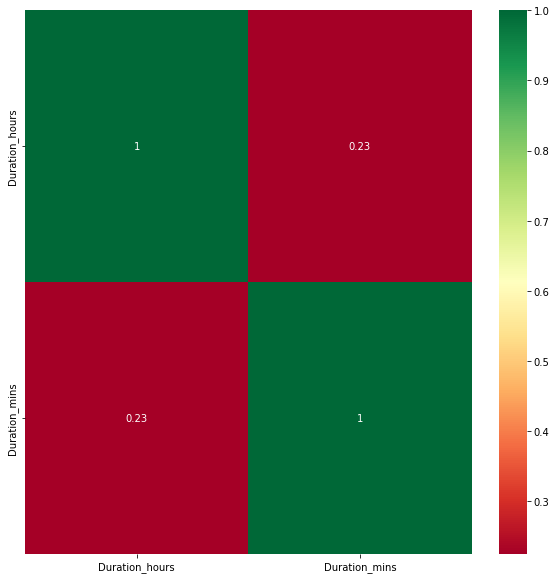

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [38]:
import sklearn

In [46]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
model = ExtraTreesClassifier()


In [47]:
ExtraTreesRegressor()

ExtraTreesRegressor()

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


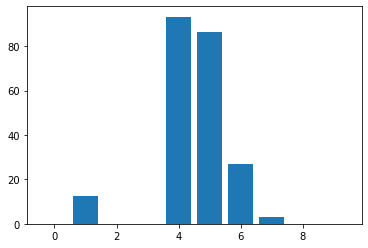

In [52]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

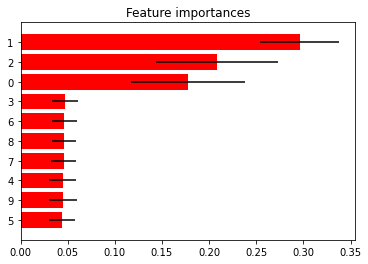

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
RandomForestRegressor()

RandomForestRegressor()

In [59]:
y_pred = reg_rf.predict(X_test)

In [60]:
reg_rf.score(X_train, y_train)

0.9674667966674791

In [61]:
reg_rf.score(X_test, y_test)

0.8428922892289229

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


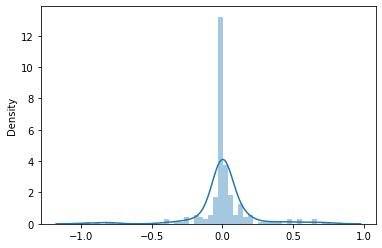

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

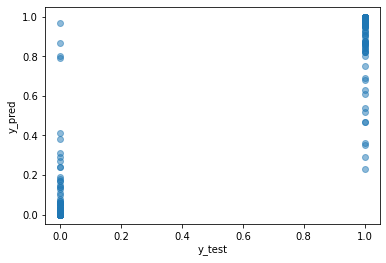

In [63]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09240000000000002
MSE: 0.039273
RMSE: 0.19817416582390351


In [67]:
metrics.r2_score(y_test, y_pred)

0.8428922892289229

# HyperParameterTuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_feat

C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.0s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.2s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.1s


C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [74]:
prediction = rf_random.predict(X_test)

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


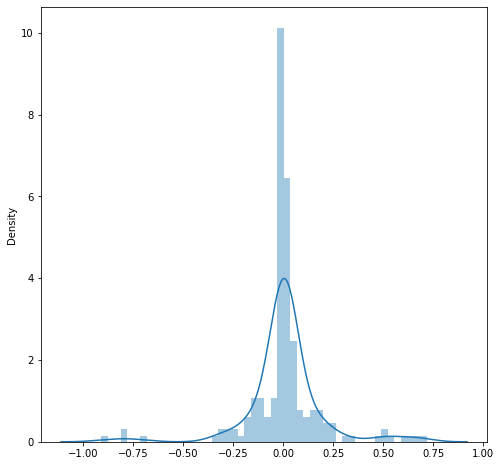

In [75]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

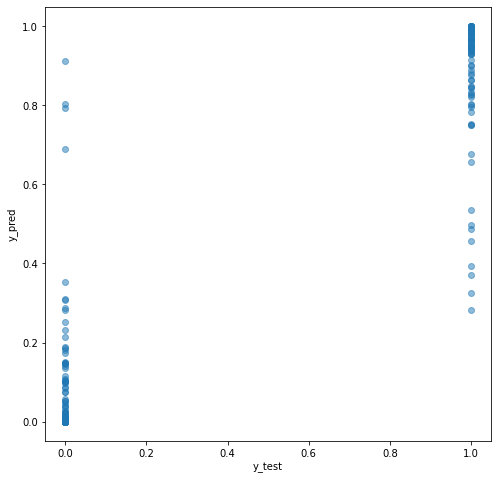

In [76]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.09640537172128695
MSE: 0.036608030530286696
RMSE: 0.19133225167306922
